<a href="https://colab.research.google.com/github/athan37/Facial-attribute-classification/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Collect and preprocess the dataset, including image resizing and normalization. Split the dataset into training, validation, and test sets.
Select an existing CNN architecture and complete, adjust it to people detection. 
Train the CNN on the training set using an appropriate loss function and optimizer.
Tune hyperparameters such as learning rate, number of layers, and number of filters to improve performance on the validation set.
Evaluate the performance of the CNN on the test set using metrics such as accuracy, precision, recall, and F1 score.
Implement people counting with traditional programming or deep learning.
Visualize the CNN's output to demonstrate its ability to accurately detect and count people in images.
Implement the solution to videos. (optional)

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
!unzip gdrive/My\ Drive/celeba_img.zip 

Archive:  gdrive/My Drive/celeba_img.zip
replace img_align_celeba/000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
A


In [2]:
import os


In [3]:
len(os.listdir("img_align_celeba"))

202599

In [4]:
os.listdir("img_align_celeba")[0]

'045617.jpg'

In [5]:
def parse(line):
  i = 0

  filename_last_idx = line.index("g") + 1
  filename = line[:filename_last_idx]

  i = filename_last_idx
  label = []

  while i < len(line):
    if line[i] == "-":
      label.append(-1)
      i += 1
    elif line[i] == "1":
      label.append(1)
    i += 1

  return filename, label



In [6]:
f = open("/content/gdrive/MyDrive/list_attr_celeba.txt", "r")
lines = f.readlines()
lines = lines[2:5002]
labels = [parse(line) for line in lines]
Y = [parse(line)[1] for line in lines]

In [7]:
f = open("/content/gdrive/MyDrive/list_attr_celeba.txt", "r")

In [18]:
import cv2
import numpy as np
import os

directory = "img_align_celeba"
data = sorted(os.listdir("img_align_celeba"))
truncatedData = data[:5000]
X = np.array([cv2.imread(os.path.join(directory, filename)) for filename in truncatedData],dtype=np.float32)

In [9]:
os.listdir("img_align_celeba")[1]

'007904.jpg'

In [10]:
X.shape

(5000, 218, 178, 3)

In [19]:
# normalization
X = X / 255

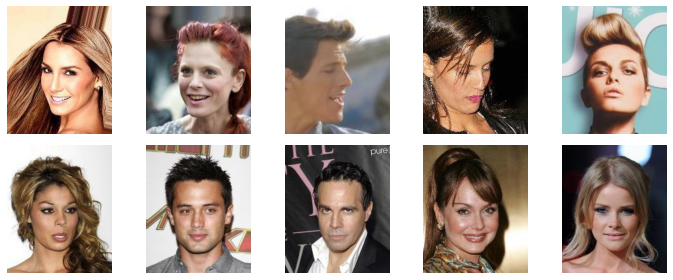

In [22]:
# Generated by chat GPT : print first 10 images from numpy list by 2 rows
import numpy as np
import matplotlib.pyplot as plt

# assume that 'images' is a numpy array of images
num_images = 10

# create a 2x5 grid of plots
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

# iterate over the first 10 images and display them in the grid
for i, axi in enumerate(ax.flat):
    if i < num_images:
        axi.imshow(cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB))
    axi.axis('off')

plt.tight_layout()
plt.show()

In [13]:
# flatten images into 1D?
flattened_dim = 218*178*3
X = X.reshape(-1, flattened_dim)
X = X.astype("float32")

In [14]:
X.shape

(5000, 116412)

In [15]:
# separate into train, valid, test
v_point = int(0.7 * len(X))
t_point = int(0.9 * len(X))

X_train = X[:v_point]
Y_train = Y[:v_point]
X_valid = X[v_point:t_point]
Y_valid = Y[v_point:t_point]
X_test  = X[t_point:]
Y_test  = Y[t_point:]